<a href="https://colab.research.google.com/github/paulantoine/covid_dept/blob/master/covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import requests
import bs4 as BeautifulSoup
import matplotlib.pyplot as plt
#import seaborn as sns
plt.style.use('fivethirtyeight') #'seaborn-notebook'
#plt.rcParams.update({'font.size': 14})

In [2]:
url = "https://www.data.gouv.fr/fr/datasets/donnees-hospitalieres-relatives-a-lepidemie-de-covid-19/"
r = requests.get(url)
soup = BeautifulSoup.BeautifulSoup(r.text)
ressources_list = soup.find("div", "resources-list")
url = None
for article in ressources_list.find_all("article"):
  if 'donnees-hospitalieres-nouveaux-covid19' in article.div.h4.text:
    url = article.find("a", "btn btn-sm btn-primary", download=True)["href"]
    break
if url == None:
  raise("data not found")
df = pd.read_csv(url, sep=";")
df.tail()

,dep,jour,incid_hosp,incid_rea,incid_dc,incid_rad
5247,976,2020-05-05,7,2,2,3
5248,976,2020-05-06,8,1,1,6
5249,976,2020-05-07,11,1,0,4
5250,976,2020-05-08,6,2,0,3
5251,976,2020-05-09,6,0,0,5


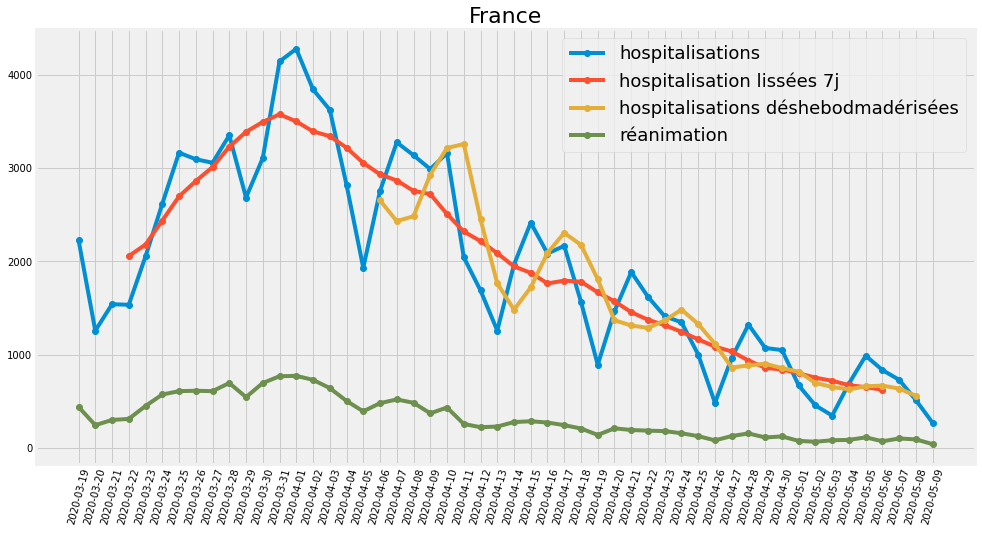

,incid_hosp,incid_rea
jour,,
2020-05-05,987,111
2020-05-06,833,69
2020-05-07,728,99
2020-05-08,510,89
2020-05-09,265,38


In [3]:
daily = df.groupby(["jour"])[["incid_hosp", "incid_rea"]].sum()

lissage_hebdo = daily.rolling(7, center=True).mean()
lissage_hebdo.columns = ["hosp_lisse", "rea_lisse"]

# essai de "désaisonnaliser" sur le rythme hebdo des trois dernières semaines + lissage 3j

modele_hebdo = daily.iloc[-7:,:].to_numpy() + daily.iloc[-14:-7,:].to_numpy() + daily.iloc[-21:-14,:].to_numpy()
modele_hebdo =  modele_hebdo / modele_hebdo.mean(axis=0)
desaiso = pd.concat([daily.iloc[-7*i -7 : -7*i ]/modele_hebdo for i in range(4,0,-1)] + [daily.iloc[-7:,:]/modele_hebdo]).rolling(3, center=True).mean()
desaiso.columns = ["hosp_desaiso", "rea_desaiso"]
france = pd.concat([daily, lissage_hebdo, desaiso], axis=1)


plt.figure(figsize=(15,8))
plt.plot(france[["incid_hosp",  "hosp_lisse", "hosp_desaiso", "incid_rea"]], marker="o")
plt.xticks(rotation=75)
plt.title("France", fontsize=22)
plt.legend(["hospitalisations", "hospitalisation lissées 7j", "hospitalisations déshebodmadérisées", "réanimation"], loc=1, fontsize=18)
plt.show()
daily.tail()

In [0]:
def display_dept(d_number, d_name):
    dept = df[df.dep==d_number]
    dept.set_index(dept.jour, inplace=True)
    plt.figure(figsize=(15,8))
    plt.plot(dept[["incid_hosp", "incid_rea"]], marker="o")
    plt.xticks(rotation=75)
    plt.title(d_name, fontsize=22)
    plt.legend(["hospitalisations", "réanimations"], loc=2, fontsize=14)
    plt.show()
    print("\ndernières données lissées 7j: \n")
    print(dept.rolling(7).mean().apply(np.rint).tail())

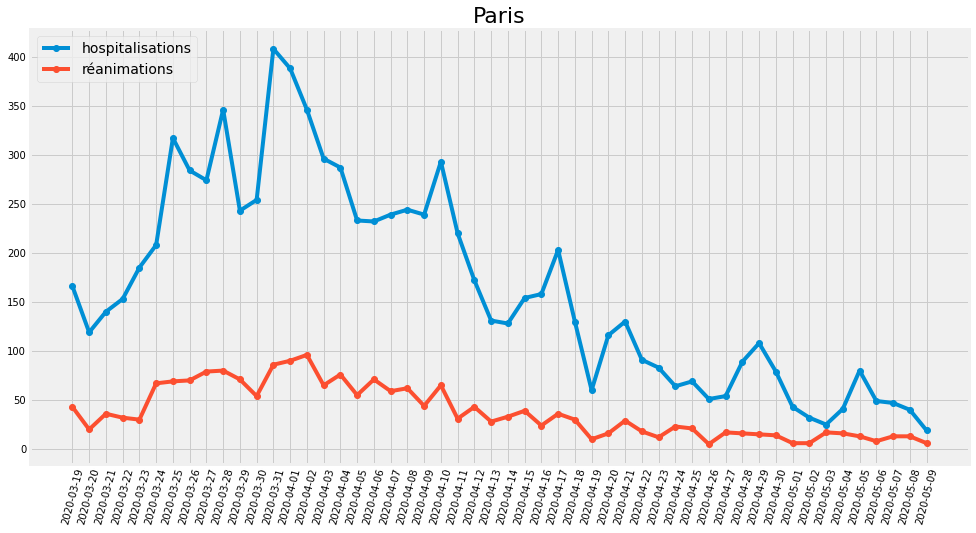


dernières données lissées 7j: 

            incid_hosp  incid_rea  incid_dc  incid_rad
jour                                                  
2020-05-05        58.0       12.0      18.0       79.0
2020-05-06        50.0       11.0      16.0       75.0
2020-05-07        45.0       11.0      14.0       79.0
2020-05-08        45.0       12.0      14.0       78.0
2020-05-09        43.0       12.0      13.0       73.0


In [5]:
display_dept("75", "Paris")

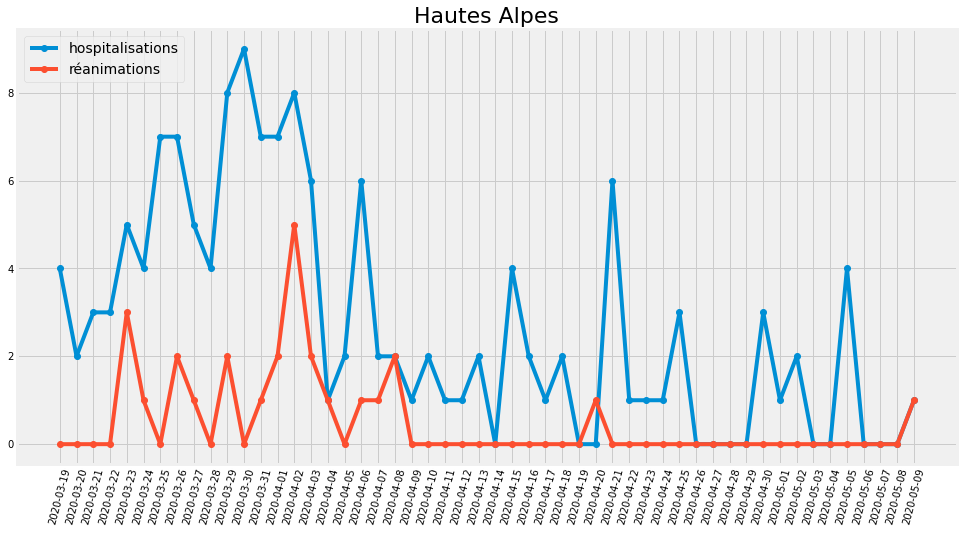


dernières données lissées 7j: 

            incid_hosp  incid_rea  incid_dc  incid_rad
jour                                                  
2020-05-05         1.0        0.0       1.0        0.0
2020-05-06         1.0        0.0       0.0        0.0
2020-05-07         1.0        0.0       0.0        0.0
2020-05-08         1.0        0.0       0.0        0.0
2020-05-09         1.0        0.0       0.0        1.0


In [6]:
display_dept("05","Hautes Alpes")

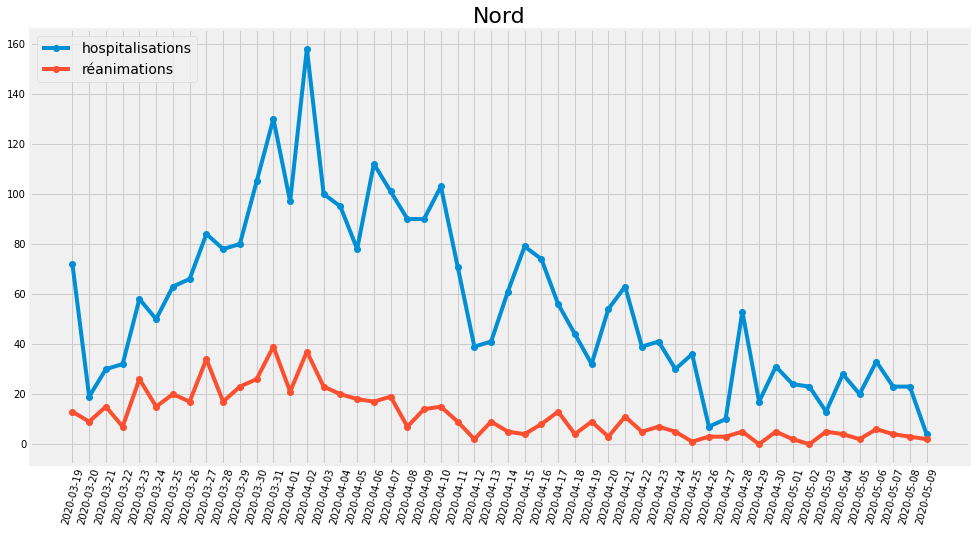


dernières données lissées 7j: 

            incid_hosp  incid_rea  incid_dc  incid_rad
jour                                                  
2020-05-05        22.0        3.0       7.0       24.0
2020-05-06        25.0        3.0       8.0       27.0
2020-05-07        23.0        3.0       8.0       25.0
2020-05-08        23.0        3.0       7.0       25.0
2020-05-09        21.0        4.0       7.0       26.0


In [7]:
display_dept("59","Nord")

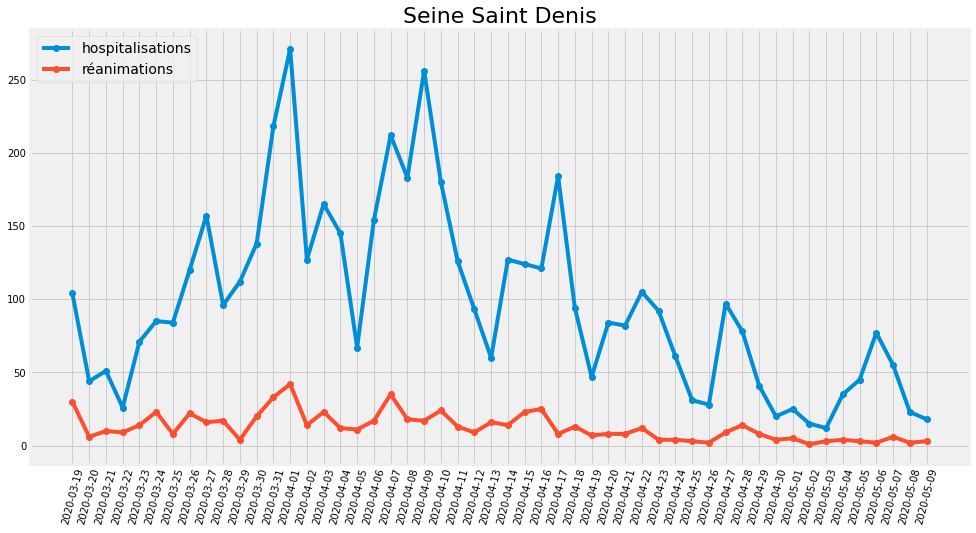


dernières données lissées 7j: 

            incid_hosp  incid_rea  incid_dc  incid_rad
jour                                                  
2020-05-05        28.0        4.0       6.0       32.0
2020-05-06        33.0        3.0       6.0       36.0
2020-05-07        38.0        3.0       6.0       43.0
2020-05-08        37.0        3.0       6.0       43.0
2020-05-09        38.0        3.0       6.0       43.0


In [8]:
display_dept("93","Seine Saint Denis")

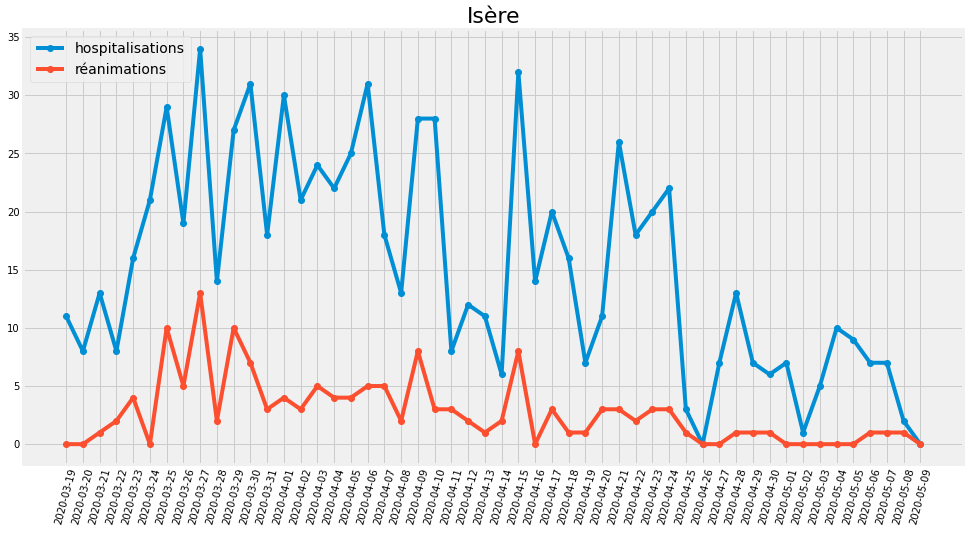


dernières données lissées 7j: 

            incid_hosp  incid_rea  incid_dc  incid_rad
jour                                                  
2020-05-05         6.0        0.0       2.0       10.0
2020-05-06         6.0        0.0       2.0        9.0
2020-05-07         7.0        0.0       1.0        6.0
2020-05-08         6.0        0.0       1.0        6.0
2020-05-09         6.0        0.0       2.0        6.0


In [9]:
display_dept("38","Isère")